--- Original Data and Target Names Loaded ---
Original Feature Dimensions: 4
Target Species: ['setosa' 'versicolor' 'virginica']
--------------------------------------------------
--- Data Standardized Successfully ---
--------------------------------------------------
--- PCA Transformation Complete ---
Variance explained by PC1: 0.7296
Variance explained by PC2: 0.2285
Total variance explained by 2 components: 0.9581
--------------------------------------------------


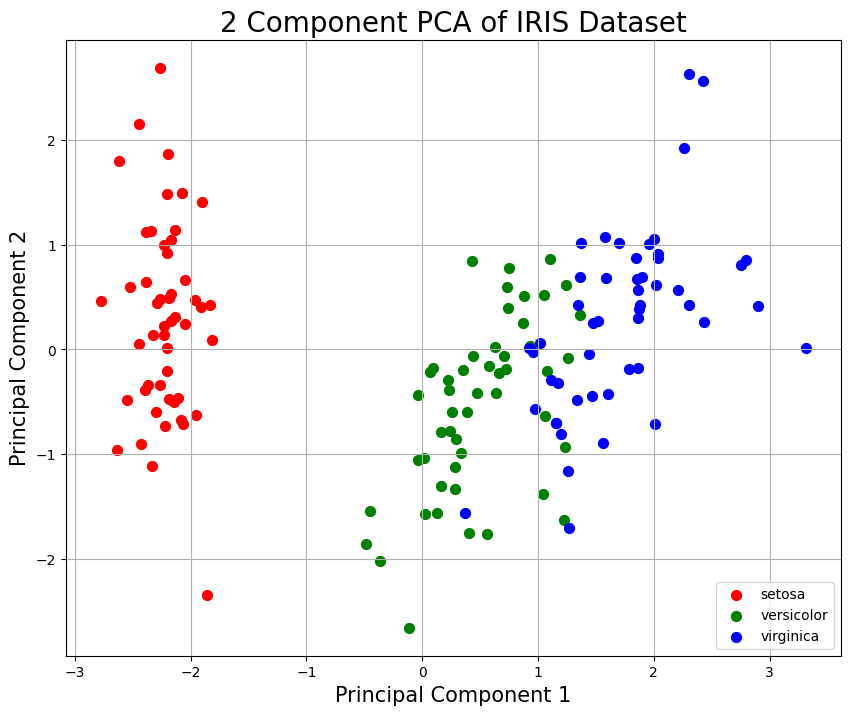

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# --- 1. Load the IRIS Dataset ---
# The IRIS dataset is a standard example for classification and dimensionality reduction.
# It has 4 features (Sepal Length, Sepal Width, Petal Length, Petal Width) and 3 classes (species).
iris = load_iris()
X = iris.data    # Features (the data we want to reduce)
y = iris.target  # Target labels (species, used only for coloring the final plot)
target_names = iris.target_names

print("--- Original Data and Target Names Loaded ---")
print(f"Original Feature Dimensions: {X.shape[1]}")
print(f"Target Species: {target_names}")
print("-" * 50)

# --- 2. Standardize the Data (Crucial Preprocessing Step for PCA) ---
# PCA is sensitive to the scale of the features. Standardization ensures that
# all features contribute equally by having a mean of 0 and a standard deviation of 1.
# This prevents features with larger numerical ranges from dominating the principal components.
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X) # Standardize the feature data X

print("--- Data Standardized Successfully ---")
print("-" * 50)


# --- 3. Apply Principal Component Analysis (PCA) ---
# The goal is to reduce the 4 features down to 2 principal components (PC1 and PC2).
# These 2 components should capture most of the variance in the original 4 features.
pca = PCA(n_components=2)

# Fit the PCA model to the standardized data and transform the data.
# The transformation projects the data onto the 2 new orthogonal axes (PC1 and PC2).
X_pca = pca.fit_transform(X_standardized)

# Print the variance explained by each component
# This shows how much information (variance) is retained by the new 2 dimensions.
print("--- PCA Transformation Complete ---")
print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"Total variance explained by 2 components: {pca.explained_variance_ratio_.sum():.4f}")
print("-" * 50)


# --- 4. Prepare Data for Visualization ---
# Create a DataFrame for easy plotting, combining the new 2 PCs with the original species labels.
df_pca = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])
final_df = pd.concat([df_pca, pd.DataFrame(y, columns=['target'])], axis = 1)


# --- 5. Visualize the 2D Projection (2 Component PCA Plot) ---
plt.figure(figsize=(10, 8))
plt.title('2 Component PCA of IRIS Dataset', fontsize=20)
plt.xlabel('Principal Component 1', fontsize=15)
plt.ylabel('Principal Component 2', fontsize=15)

colors = ['r', 'g', 'b'] # Red, Green, Blue for the three species
# target is the integer label (0, 1, 2)
# color is the corresponding plot color
# label is the species name ('setosa', 'versicolor', 'virginica')
for target, color in zip([0, 1, 2], colors):
    indices_to_keep = final_df['target'] == target
    
    # Plot the points for each species using the two principal components as coordinates
    plt.scatter(final_df.loc[indices_to_keep, 'principal component 1'],
                final_df.loc[indices_to_keep, 'principal component 2'],
                c = color,
                s = 50,
                label = target_names[target])

plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# --- Conclusion Note ---
# The resulting 2D plot shows that the 'setosa' species (red) is highly separable from the 
# other two, demonstrating PCA's effectiveness in visualizing high-dimensional data.